<a href="https://colab.research.google.com/github/subodh2708/deep-learning---tensorflow-2.0/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with neural networks in tensorflow

In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [2]:
import numpy as np 
import matplotlib.pyplot as plt

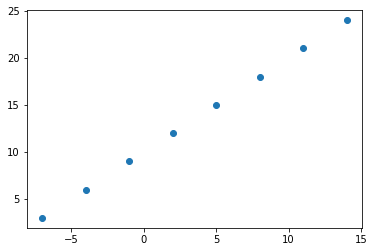

In [3]:
#Create Features 
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

# Create Labels

y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

# Visualize it 

plt.scatter(X,y)

In [4]:
y = X + 10
y

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

input and output shapes

In [5]:
house_info = tf.constant(['bedroom','bathroom','garage'])
house_price = tf.constant([939700])
house_info , house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
input_shape = X.shape
output_shape = y.shape

input_shape , output_shape

((8,), (8,))

In [7]:
# turn numpy array into tensors

X = tf.constant(X, dtype= tf.float32)
y = tf.constant(y, dtype = tf.float32)
X.shape, y.shape
X
y

<tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape,output_shape

(TensorShape([]), TensorShape([]))

## Steps in modelling in tenorflow

In [9]:
tf.random.set_seed(42)

# 1. Create a model using sequential API
model  = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])

# 2. compile a model 

model.compile(loss= tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. fit the model

model.fit(tf.expand_dims(X,axis=-1),y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 321ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 6ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 10.9748 - mae: 10.9748


In [10]:
# try and make prediction on model

model.predict([17.0])

array([[12.716021]], dtype=float32)

##Improving our model

In [11]:
# let's rebuild our model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

model.fit(tf.expand_dims(X, axis= -1),y , epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 270ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 27ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 

In [12]:
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [13]:
model.predict([17])

array([[29.739855]], dtype=float32)

In [14]:
# let's try be using Adam optimizer and an extra layer

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics = ['mae'])

model.fit(tf.expand_dims(X, axis=-1),y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 404ms/step - loss: 12.3193 - mae: 12.3193
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 11.5062 - mae: 11.5062
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 10.6739 - mae: 10.6739
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 9.8419 - mae: 9.8419
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 8.9962 - mae: 8.9962
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 8.1347 - mae: 8.1347
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 7.4053 - mae: 7.4053
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 6.6763 - mae: 6.6763
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 5.9141 - mae: 5.9141
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 5.1125 - mae: 5.1125
Epoch 11/100
1/1 [==============================] - 0s 10ms/ste

In [15]:
model.predict([17])

array([[27.159163]], dtype=float32)

In [16]:
# lets create a bigger data

X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [17]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

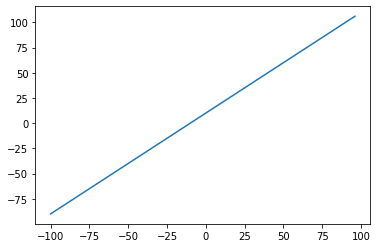

In [18]:
import matplotlib.pyplot as plt

plt.plot(X,y)

In [19]:
len(X)

50

In [20]:
# split the data in train test split

X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

# visualize the model

## visualize the data

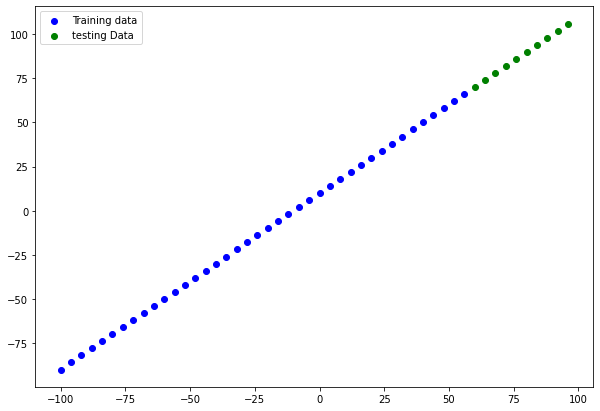

In [21]:

# visualise the data

plt.figure(figsize=(10,7))

plt.scatter(X_train,y_train,c = 'b', label = 'Training data')

plt.scatter(X_test,y_test, c = 'g', label = 'testing Data')

plt.legend()

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics= ['mae'])

In [23]:
X.shape

TensorShape([50])

In [24]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape= [1],name= 'input_layer'),
    tf.keras.layers.Dense(1, name= 'output_layer')
], name= 'first_model')

model.compile(loss=tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics = ["mae"])

In [25]:
model.summary()

Model: "first_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.fit(X_train, y_train , epochs=100 , verbose=0)

In [27]:
model.summary()

Model: "first_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


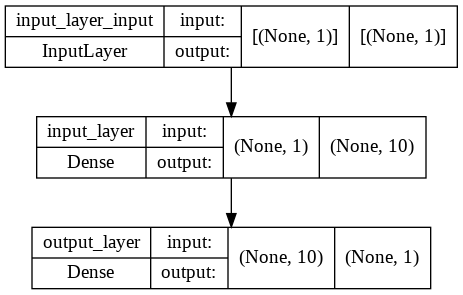

In [28]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes= True)

## visualizing the model prediction

In [29]:
# make some prediction 

y_pred = model.predict(X_test)
y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [43]:
X_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>

In [42]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [40]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

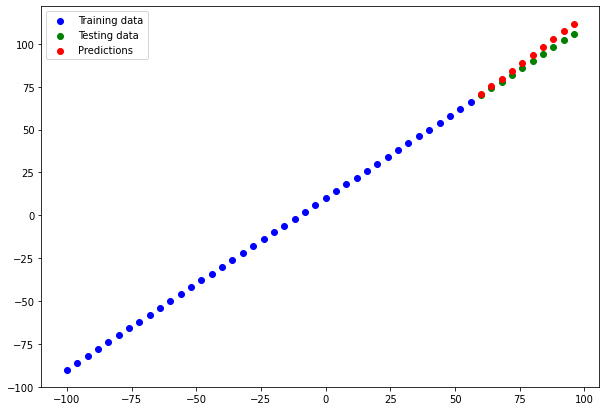

In [41]:
plot_predictions(train_data= X_train,
                 train_labels = y_train,
                 test_data = X_test,
                 test_labels = y_test,
                 predictions = y_pred)

##Evaluating our model's prediction with regression evaluation metrics

In [44]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 218ms/step - loss: 3.1969 - mae: 3.1969


[3.196942090988159, 3.196942090988159]

In [47]:
tf.keras.losses.MAE(y_test,y_pred )

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558258 , 14.1160555, 11.708948 , 10.336929 , 10.       ,
       10.698161 , 12.447118 , 15.333002 , 19.253975 , 23.841698 ],
      dtype=float32)>

In [48]:
tf.metrics.mean_absolute_error(y_test,y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558258 , 14.1160555, 11.708948 , 10.336929 , 10.       ,
       10.698161 , 12.447118 , 15.333002 , 19.253975 , 23.841698 ],
      dtype=float32)>

In [52]:
y_test.shape

TensorShape([10])

In [51]:
y_pred.shape

(10, 1)

In [53]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.55218 ,  75.13991 ,  79.72763 ,  84.31535 ,  88.903076,
        93.49081 ,  98.07853 , 102.66625 , 107.253975, 111.8417  ],
      dtype=float32)>

In [56]:
mae = tf.metrics.mean_absolute_error(y_true= y_test,
                                     y_pred= tf.squeeze(y_pred))

In [57]:
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>

In [59]:
mse = tf.metrics.mean_squared_error(y_true= y_test,
                                    y_pred = tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.070143>

In [60]:
# let's make some function to reuse MAE and MSE

def mae(y_test,y_pred):
  return tf.metrics.mean_absolute_error(y_true= y_test,
                                        y_pred = y_pred)
  
def mse(y_test,y_pred):
  return tf.metrics.mean_absolute_error(y_true = y_test,
                                        y_pred  = y_pred)